## Connect to Gemini api

官网介绍更全面：https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview?hl=zh-cn

VertexAI是企业级的，这里的这个适合小型实验。

In [1]:
!pip install -q google-generativeai

In [2]:
!pip install --upgrade -q google-generativeai  # upgrading the google-generativeai library

In [3]:
!pip show google-generativeai

Name: google-generativeai
Version: 0.5.0
Summary: Google Generative AI High level API client library and tools.
Home-page: https://github.com/google/generative-ai-python
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /Users/sallyw/machine-learning-lab/Gemini-api-pjs/env/lib/python3.12/site-packages
Requires: google-ai-generativelanguage, google-api-core, google-api-python-client, google-auth, protobuf, pydantic, tqdm, typing-extensions
Required-by: 


In [4]:
with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()

In [5]:
import google.generativeai as genai

genai.configure(api_key=api_key)

# iterate through the list of available models
for m in genai.list_models():
    # check if the 'generateContent' method is supported by the model
    if 'generateContent' in m.supported_generation_methods:
        # if so, print the model name
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text by text input with gemini pro

In [6]:
# create a model instance
model = genai.GenerativeModel('gemini-pro')

In [11]:
# get response by a text input
response = model.generate_content('What do you think about Tokyo?')
response.text

"**Vibrant Metropolis with a Unique Blend of Tradition and Modernity**\n\n**Pros:**\n\n* **Cultural Hub:** Tokyo is a cultural epicenter, offering world-renowned museums, theaters, and shrines that showcase Japan's rich history and traditions.\n* **Technological Advancements:** The city is known for its cutting-edge technology, from bullet trains to high-rise skyscrapers, providing a glimpse into Japan's advanced society.\n* **Bustling Nightlife:** Tokyo's vibrant nightlife scene offers a diverse range of entertainment options, from lively bars and clubs to traditional karaoke venues.\n* **Gastronomic Paradise:** Tokyo is a foodie's heaven, with countless restaurants serving everything from traditional sushi to international cuisine.\n* **Efficient Transportation:** The city's comprehensive public transportation system, including subways and trains, makes it easy to navigate and explore.\n* **Natural Beauty:** Despite its urban density, Tokyo offers pockets of tranquility, such as the 

In [8]:
# get response by a text input
response = model.generate_content('你觉得东京这座城市怎么样？')
response.text

'**东京：一个充满活力的国际化大都市**\n\n东京是日本首都，也是世界上最大、人口最多的都市区之一。它以其繁华的城市景观、先进的基础设施和丰富的文化遗产而闻名。\n\n**城市景观：**\n\n* 东京的天际线由摩天大楼和标志性建筑组成，如东京晴空塔和东京塔。\n* 它拥有世界著名的购物和娱乐区，如涩谷、银座和六本木。\n* 这座城市拥有许多绿地，包括皇居花园和上野公园。\n\n**基础设施：**\n\n* 东京拥有世界上最先进的公共交通系统之一，包括地铁、火车和巴士。\n* 其道路网络井井有条，连接城市各个角落。\n* 它拥有几个国际机场，包括成田国际机场和羽田机场。\n\n**文化遗产：**\n\n* 东京拥有丰富的历史和文化遗产，拥有许多寺庙、神社和博物馆。\n* 它以其独特的美食而闻名，包括寿司、拉面和天妇罗。\n* 这座城市拥有繁荣的艺术和文化场景，举办各种展览、表演和活动。\n\n**其他方面：**\n\n* **生活成本：**东京的生活成本很高，但也有许多负担得起的选择。\n* **安全：**东京是一个非常安全的城市，犯罪率低。\n* **人数：**东京是大规模移民的城市，拥有来自世界各地的人们。\n* **经济：**东京是世界领先的经济中心，拥有许多大公司和企业总部。\n\n**优点：**\n\n* 繁华的城市环境，提供丰富的娱乐和文化机会。\n* 先进的基础设施，使其易于出行和生活。\n* 丰富的文化遗产，包括寺庙、神社和博物馆。\n* 安全环境和低犯罪率。\n\n**缺点：**\n\n* 生活成本高，尤其是住房。\n* 人口众多，导致拥挤和通勤时间长。\n* 地震和台风等自然灾害风险。\n* 工作文化可能具有竞争力和要求很高。\n\n总体而言，东京是一个充满活力的国际化大都市，提供了独特的城市体验。它拥有繁华的城市景观、先进的基础设施和丰富的文化遗产。尽管生活成本高，但东京仍然是一个令人兴奋的目的地，适合寻求城市冒险的人们。'

In [14]:
# check the prompt safety level
# print(response.prompt_feedback)

## Streaming generation

In [15]:
prompt = 'Write me a story about a little wolf'
response = model.generate_content(prompt, stream=True)
for chunk in response:
    print(chunk.text)
    print('-' * 100)

In the heart of a sprawling forest, hidden amidst towering trees, lived a tiny
----------------------------------------------------------------------------------------------------
 wolf pup named Luna. Her silver-gray fur shone like moonlight, and her bright blue eyes sparkled with mischief.

Luna was the youngest in her pack
----------------------------------------------------------------------------------------------------
, and the most curious. She loved exploring the forest, discovering its hidden nooks and crannies. One sunny afternoon, as she was wandering through a dense undergrowth, a peculiar scent caught her attention.

It was the sweet fragrance of honey. Luna followed her nose until she stumbled upon a towering beehive.
----------------------------------------------------------------------------------------------------
 Bees buzzed around the hive, guarding their golden treasure.

Undeterred, Luna crept closer, her claws scraping against the rough bark of the tree. She ext

## Generate text from image by gemini pro vision

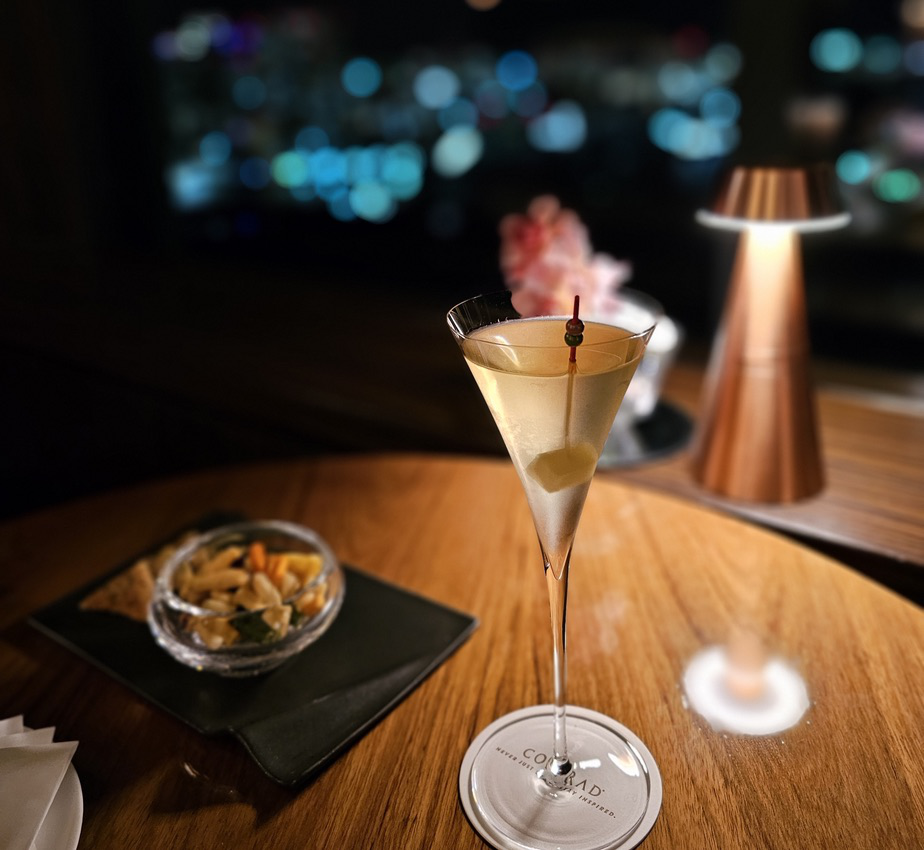

In [16]:
from PIL import Image
img = Image.open('pic.jpeg')
img

In [17]:
# create a model instance from gemini pro vision
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)
response.text

' 夜景を眺めながら飲むカクテルは最高ですね。'

In [18]:
prompt = 'list all the object in the picture.'
response = model.generate_content([prompt, img])
response.text

' 1. Martini glass\n2. Cocktail\n3. Coaster\n4. Table\n5. Plate\n6. Bowl of nuts\n7. Lamp\n8. Window\n9. Cityscape'

In [19]:
print(response.text)

 1. Martini glass
2. Cocktail
3. Coaster
4. Table
5. Plate
6. Bowl of nuts
7. Lamp
8. Window
9. Cityscape


## Gemini api generation parameters

In [21]:
# define a GenerationConfig object (default ⬇)
generation_config = genai.types.GenerationConfig()
# with different config options
# generation_config = genai.types.GenerationConfig(
#     canditate_count=1,
#     stop_sequence=[','], # stop when the response meet a ','
#     max_output_tokens=32000, # output token limit
#     temperature=0.9, # 0 is steady and 1 is creativity
#     top_p=1,
#     top_k=1
# )

# 2 way use the config
# define on the model instance
model = genai.GenerativeModel('gemini-pro', generation_config=generation_config)
# define on the single prompt
prompt = 'Write me a little song about Gemini.'
response = model.generate_content(prompt, generation_config=generation_config)

In [22]:
print(response.text)

(Verse 1)
Oh, Gemini, sign so bright,
Twins forever, day and night.
A paradox, a duality,
A blend of brilliance and reality.

(Chorus)
Gemini, Gemini, a curious soul,
With thoughts that race and stories to unfold.
Adaptable and quick-witted, you see,
A master of words, a social bee.

(Verse 2)
Your mind is sharp, your intellect astute,
You seek knowledge, always pursuing the truth.
A communicator, connecting with ease,
Sharing insights, setting hearts at peace.

(Chorus)
Gemini, Gemini, a curious soul,
With thoughts that race and stories to unfold.
Adaptable and quick-witted, you see,
A master of words, a social bee.

(Bridge)
But like the twins, you have your different sides,
A playful spirit, a serious guide.
An observer of life, with a keen eye,
You balance wisdom and fantasy.

(Verse 3)
In solitude, you find your sanctuary,
Lost in thought, seeking clarity.
But in the crowd, you shine like a star,
A charismatic presence, near and far.

(Chorus)
Gemini, Gemini, a curious soul,
With 

In [23]:
# help for the generation config parameters
help(genai.types.GenerationConfig)

Help on class GenerationConfig in module google.generativeai.types.generation_types:

class GenerationConfig(builtins.object)
 |  GenerationConfig(candidate_count: 'int | None' = None, stop_sequences: 'Iterable[str] | None' = None, max_output_tokens: 'int | None' = None, temperature: 'float | None' = None, top_p: 'float | None' = None, top_k: 'int | None' = None) -> None
 |
 |  A simple dataclass used to configure the generation parameters of `GenerativeModel.generate_content`.
 |
 |  Attributes:
 |      candidate_count:
 |          Number of generated responses to return.
 |      stop_sequences:
 |          The set of character sequences (up
 |          to 5) that will stop output generation. If
 |          specified, the API will stop at the first
 |          appearance of a stop sequence. The stop sequence
 |          will not be included as part of the response.
 |      max_output_tokens:
 |          The maximum number of tokens to include in a
 |          candidate.
 |
 |         

In [25]:
# display default generation parameters values
genai.get_model('models/gemini-pro')

Model(name='models/gemini-pro',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro',
      description='The best model for scaling across a wide range of tasks',
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.9,
      top_p=1.0,
      top_k=1)

In [26]:
genai.get_model('models/gemini-pro-vision')

Model(name='models/gemini-pro-vision',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro Vision',
      description='The best image understanding model to handle a broad range of applications',
      input_token_limit=12288,
      output_token_limit=4096,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.4,
      top_p=1.0,
      top_k=32)

## Gemini API Generation Parameters Explained

In [ ]:
generation_config = genai.types.GenerationConfig(
    candidate_count=1,
    # stop_sequences=[';']
    # max_output_tokens=32000
    temperature=0.0,
    top_k=4,
    top_p=1
    # A, B, C = 0.3, 0.2, 0.1, top_p=0.5
)

# setting the temperature to 0
generation_config_temp_0 = genai.types.GenerationConfig(
    temperature=0.0
)

# setting the temperature to 1
generation_config_temp_1 = genai.types.GenerationConfig(
    temperature=1.0 
)

model = genai.GenerativeModel('gemini-pro')

prompt = 'What is the meaning of life?'

# generating a response for the prompt with a temperature of zero
response_temp_0 = model.generate_content(prompt, generation_config=generation_config_temp_0)

# generating a response for the prompt with a temperature of one
response_temp_1 = model.generate_content(prompt, generation_config=generation_config_temp_1)

print(response_temp_0.text)
print('\n' + '*' * 100 + '\n')
print(response_temp_1.text)